**Word2Vec 이용한 임베딩 벡터 코드**<br>
문서 벡터 활용한 책 추천 시스템<br>
참고자료: https://wikidocs.net/102705<br>
파일 다운로드 링크: https://drive.google.com/file/d/15Q7DZ7xrJsI2Hji-WbkU9j1mwnODBd5A/view?usp=sharing

In [1]:
from google.colab import files
myfile=files.upload()

Saving data.csv to data.csv


In [2]:
import io
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(io.BytesIO(myfile['data.csv']))

In [4]:
data[:5]

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


여기서는 줄거리에 해당하는 Desc가 추천 시스템 구성시 필요

In [5]:
data['cleaned']=data['Desc']

데이터 전처리(1)-아스키코드표에 있는 단어만 추리기

In [6]:
def remove_Non_Ascii(s):
  return "".join(i for i in s if ord(i)<128)
  #문장이 들어오면 문자 한개씩 체크해서 아스키코드표에 있으면 join 시키는 코드

In [7]:
data['cleaned']=data['cleaned'].apply(remove_Non_Ascii)

In [8]:
data['cleaned']

0       We know that power is shifting: From West to E...
1       Following the success of The Accidental Billio...
2       How to tap the power of social software and ne...
3       William J. Bernstein is an American financial ...
4       Amazing book. And I joined Steve Jobs and many...
                              ...                        
2377    Ralph Roberts, a sus setenta aos y tras la mue...
2378    Murder at the Vicarage marks the debut of Agat...
2379    In 1951 John Wyndham published his novel The D...
2380    This now classic book revealed Flannery O'Conn...
2381    Imbued on every page with Frank McCourt's asto...
Name: cleaned, Length: 2382, dtype: object

데이터 전처리(2)-소문자화 시키기

In [9]:
def make_lower_case(text):
  return text.lower()

In [10]:
data['cleaned']=data['cleaned'].apply(make_lower_case)

In [11]:
data['cleaned']

0       we know that power is shifting: from west to e...
1       following the success of the accidental billio...
2       how to tap the power of social software and ne...
3       william j. bernstein is an american financial ...
4       amazing book. and i joined steve jobs and many...
                              ...                        
2377    ralph roberts, a sus setenta aos y tras la mue...
2378    murder at the vicarage marks the debut of agat...
2379    in 1951 john wyndham published his novel the d...
2380    this now classic book revealed flannery o'conn...
2381    imbued on every page with frank mccourt's asto...
Name: cleaned, Length: 2382, dtype: object

데이터 전처리(3)-불용어 제거

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
def remove_stop_words_tokenize(text):
  text=word_tokenize(text)
  stop_words=stopwords.words('english')
  tmp=[]
  for w in text:
    if w not in stop_words:
      tmp.append(w)
  return " ".join(tmp)

In [16]:
print(remove_stop_words_tokenize(data['cleaned'][0]))

know power shifting : west east north south , presidential palaces public squares , formidable corporate behemoths nimble startups , slowly surely , men women . power merely shifting dispersing . also decaying . power today constrained risk losing ever . end power , award-winning columnist former foreign policy editor moiss nam illuminates struggle once-dominant megaplayers new micropowers challenging every field human endeavor . drawing provocative , original research , nam shows antiestablishment drive micropowers topple tyrants , dislodge monopolies , open remarkable new opportunities , also lead chaos paralysis . nam deftly covers seismic changes underway business , religion , education , within families , matters war peace . examples abound walks life : 1977 , eighty-nine countries ruled autocrats today half world 's population lives democracies . ceo 's constrained shorter tenures predecessors . modern tools war , cheaper accessible , make possible groups like hezbollah afford dr

In [17]:
def remove_stop_words(text):
  text=text.split()
  stop_words=stopwords.words('english')
  tmp=[]
  for w in text:
    if w not in stop_words:
      tmp.append(w)
  return " ".join(tmp)

In [18]:
print(remove_stop_words(data['cleaned'][0]))

know power shifting: west east north south, presidential palaces public squares, formidable corporate behemoths nimble startups and, slowly surely, men women. power merely shifting dispersing. also decaying. power today constrained risk losing ever before. end power, award-winning columnist former foreign policy editor moiss nam illuminates struggle once-dominant megaplayers new micropowers challenging every field human endeavor. drawing provocative, original research, nam shows antiestablishment drive micropowers topple tyrants, dislodge monopolies, open remarkable new opportunities, also lead chaos paralysis. nam deftly covers seismic changes underway business, religion, education, within families, matters war peace. examples abound walks life: 1977, eighty-nine countries ruled autocrats today half world's population lives democracies. ceo's constrained shorter tenures predecessors. modern tools war, cheaper accessible, make possible groups like hezbollah afford drones. second half 2

위 코드를 통해 tokenize와 .split()의 차이를 확인할 수 있다.

In [19]:
data['cleaned']=data['cleaned'].apply(remove_stop_words)

In [20]:
data['cleaned']

0       know power shifting: west east north south, pr...
1       following success accidental billionaires mone...
2       tap power social software networks build busin...
3       william j. bernstein american financial theori...
4       amazing book. joined steve jobs many akio mori...
                              ...                        
2377    ralph roberts, sus setenta aos tras la muerte ...
2378    murder vicarage marks debut agatha christies u...
2379    1951 john wyndham published novel day triffids...
2380    classic book revealed flannery o'connor one or...
2381    imbued every page frank mccourt's astounding h...
Name: cleaned, Length: 2382, dtype: object

데이터 전처리(4)-html 형식 제거

In [21]:
import re

In [22]:
def remove_html(text):
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

In [23]:
data['cleaned']=data['cleaned'].apply(remove_html)

In [24]:
data['cleaned']

0       know power shifting: west east north south, pr...
1       following success accidental billionaires mone...
2       tap power social software networks build busin...
3       william j. bernstein american financial theori...
4       amazing book. joined steve jobs many akio mori...
                              ...                        
2377    ralph roberts, sus setenta aos tras la muerte ...
2378    murder vicarage marks debut agatha christies u...
2379    1951 john wyndham published novel day triffids...
2380    classic book revealed flannery o'connor one or...
2381    imbued every page frank mccourt's astounding h...
Name: cleaned, Length: 2382, dtype: object

데이터 전처리(5)-구두점 제거

In [25]:
import string

In [26]:
def delete_punctuation(text):
  return "".join(letter for letter in text if letter not in string.punctuation)

In [27]:
data['cleaned']=data['cleaned'].apply(delete_punctuation)

In [28]:
data['cleaned']

0       know power shifting west east north south pres...
1       following success accidental billionaires mone...
2       tap power social software networks build busin...
3       william j bernstein american financial theoris...
4       amazing book joined steve jobs many akio morit...
                              ...                        
2377    ralph roberts sus setenta aos tras la muerte d...
2378    murder vicarage marks debut agatha christies u...
2379    1951 john wyndham published novel day triffids...
2380    classic book revealed flannery oconnor one ori...
2381    imbued every page frank mccourts astounding hu...
Name: cleaned, Length: 2382, dtype: object

전처리 과정 중 빈 값이 생겼을 수도 있으니 제거

In [29]:
data['cleaned'].replace('', np.nan, inplace=True)
data=data[data['cleaned'].notna()]

Word2Vec 훈련 시키기 위한 토큰화 과정

In [30]:
token=[]
for text in data['cleaned']:
  token.append(text.split())

In [31]:
token2=[]
for text in data['cleaned']:
  token2.append(word_tokenize(text))

Word2Vec 훈련시키기(Tokenize 선택)

In [32]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec(sentences=token2, size=300, window=5, min_count=2, workers=-1, sg=0)

In [33]:
print(word2vec_model.wv.most_similar("man"))

[('memo', 0.23180341720581055), ('bookseller', 0.19925057888031006), ('operate', 0.19543194770812988), ('coins', 0.19512048363685608), ('kaleidoscopic', 0.19328255951404572), ('compounding', 0.19150717556476593), ('disparate', 0.19085684418678284), ('mapping', 0.190851628780365), ('erupts', 0.18946045637130737), ('efficiently', 0.1872876137495041)]


사전훈련된 Word2Vec 사용(Tokenize 선택)

In [42]:
import urllib.request

In [43]:
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")

('GoogleNews-vectors-negative300.bin.gz',
 <http.client.HTTPMessage at 0x7f51b63b9358>)

In [44]:
word2vec_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
word2vec_model.build_vocab(token2)
word2vec_model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)
word2vec_model.train(token2, total_examples = word2vec_model.corpus_count, epochs = 15)

(0, 0)

In [45]:
print(word2vec_model.wv.most_similar("man"))

[('woman', 0.7664012908935547), ('boy', 0.6824870109558105), ('teenager', 0.6586930155754089), ('girl', 0.5921714305877686), ('robber', 0.5585119128227234), ('men', 0.5489763021469116), ('guy', 0.5420035123825073), ('person', 0.5342026352882385), ('gentleman', 0.5337990522384644), ('suspect', 0.5247484445571899)]


단어 벡터의 평균을 이용한 문서 벡터 구하기

In [47]:
def text_vectors(text):
  text_embedding=[]
  for line in text:
    doc2vec=None
    count=0
    for word in line.split():
      if word in word2vec_model.wv.vocab:
        count+=1
        if doc2vec is None:
          doc2vec=word2vec_model[word]
        else:
          doc2vec=doc2vec+word2vec_model[word]
    if doc2vec is not None:
      doc2vec=doc2vec/count
      text_embedding.append(doc2vec)
  return text_embedding

In [48]:
text_embedding_list=text_vectors(data['cleaned'])
print(len(text_embedding_list))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


2381


코사인 유사도 측정하기

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
cosine_similar=cosine_similarity(text_embedding_list, text_embedding_list)
print(cosine_similar.shape)

(2381, 2381)


In [38]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [39]:
def recommendations(title):
  books=data[['title', 'image_link']]
  title_idx=pd.Series(data.index, index=data['title']).drop_duplicates()
  pick_idx=title_idx[title]
  #내가 원하는 책이 데이터 상 몇번째 index인지 알아냄

  sim_scores=cosine_similar[pick_idx]
  sim_scores=np.argsort(-sim_scores)
  sim_scores=sim_scores[1:6]
  #코사인 유사도가 높은 순서대로 정렬 후 그 index 뽑아내기

  recommend=books.iloc[sim_scores].reset_index(drop=True)
  #해당 인덱스의 책만 뽑아냄


  fig=plt.figure(figsize=(20, 30))
  for i in range(5):
    title=recommend.loc[i, 'title']
    img_link=recommend.loc[i, 'image_link']
    img=Image.open(BytesIO(requests.get(img_link).content))
    fig.add_subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(title)
    #데이터프레임으로부터 순차적으로 이미지 불러옴


존재하는 데이터로만 학습시켰을 때의 추천 결과

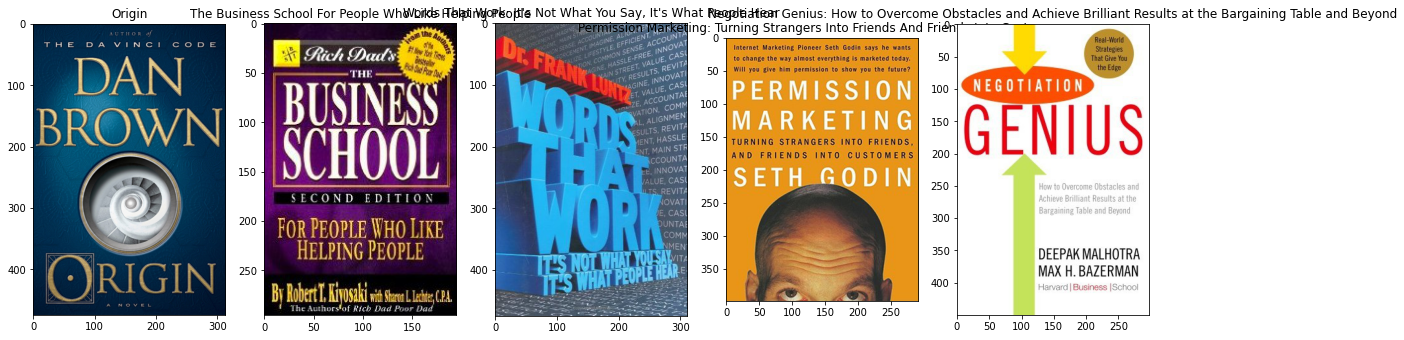

In [40]:
recommendations("The Da Vinci Code")

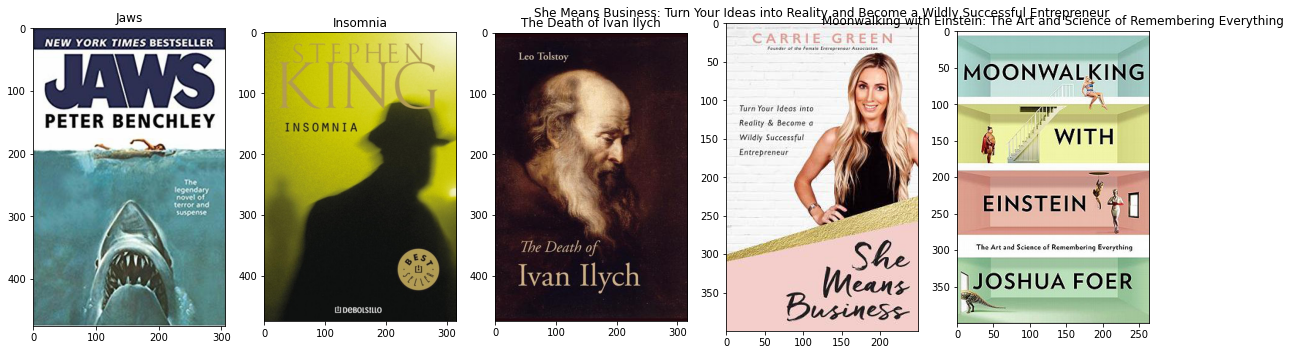

In [41]:
recommendations("The Murder of Roger Ackroyd")

사전 학습된 Word2Vec 이용하여 학습시켰을 때의 추천 결과

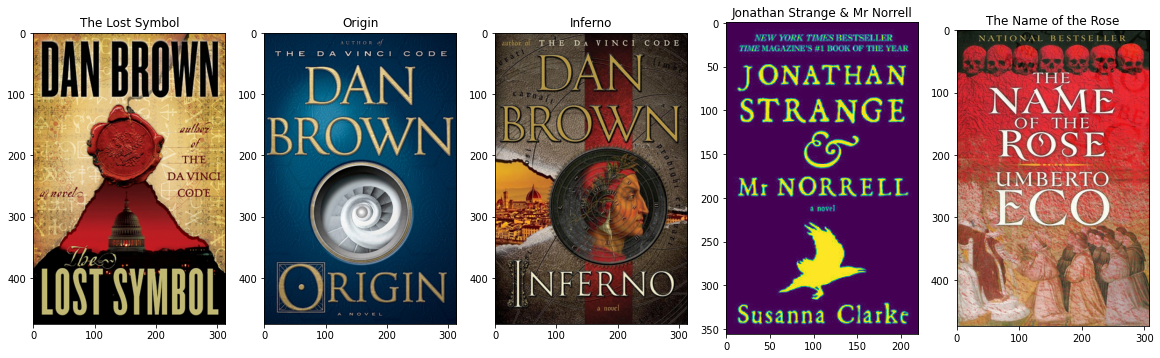

In [50]:
recommendations("The Da Vinci Code")

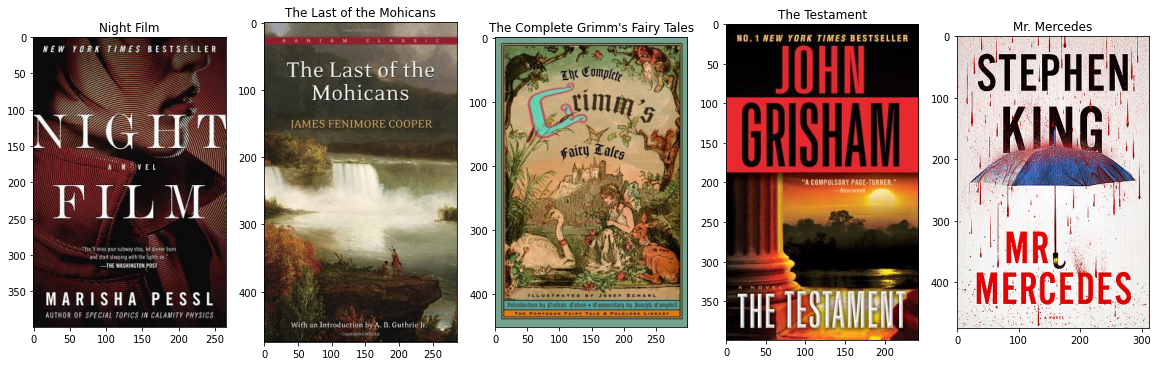

In [51]:
recommendations("The Murder of Roger Ackroyd")

사전학습된 Word2Vec을 이용하는 것이 추천 결과가 더 좋은 것을 알 수 있다.<br>
1)The Da Vinci Code 의 경우 동일 작가의 책이 더 추천되는 것을 알 수 있다.<br>
2)The Murder of Roger Ackroyd의 경우 미스터리 스릴 소설인데 연관된 책이 더 추천되는 것을 알 수 있다.